In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# increase the width of the pandas dataframe to allow scrolling through all columns

pd.options.display.max_columns = 100

In [2]:
# train = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\train\train.csv")
test = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\test\test.csv")
train = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\train\train.csv")
year3 = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\year3.csv")
year2 = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\year2.csv")
year1 = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\year1.csv")
year0 = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\year0.csv")
china = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\china.csv")

In [3]:
year0.shape

(1541, 1595)

In [4]:
bow = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\out_bag_of_words_5.csv")
features = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\out_vocab_5.txt")
features = features.values[0:, ]
features[32]

array(['aid'], dtype=object)

# We make the assumption that the first investor is the lead investor

Let's just confirm the values all lie between 0 and 1

In [5]:
train = train.drop(['COMPANY', 'NOTES'], axis = 1)
test = test.drop(['COMPANY', 'NOTES'], axis = 1)
year3 = year3.drop(['COMPANY', 'NOTES', 'Year_3.0'], axis = 1)
year2 = year2.drop(['COMPANY', 'NOTES', 'Year_2.0'], axis = 1)
year1 = year1.drop(['COMPANY', 'NOTES', 'Year_1.0'], axis = 1)
year0 = year0.drop(['COMPANY', 'NOTES', 'Year_0.0'], axis = 1)
china = china.drop(['COMPANY', 'NOTES'], axis = 1)

# Analyze with LDA

When you do this you probably want to try a few different n_components to see how robust the results are-- but that's after you get your main results!

In [6]:
from sklearn.decomposition import LatentDirichletAllocation


lda = LatentDirichletAllocation(n_components = 5)
lda_year0 = LatentDirichletAllocation(n_components = 5)
lda_year1 = LatentDirichletAllocation(n_components = 5)
lda_year2 = LatentDirichletAllocation(n_components = 5)
lda_year3 = LatentDirichletAllocation(n_components = 5)
lda_china = LatentDirichletAllocation(n_components = 5)
lda_bow = LatentDirichletAllocation(n_components = 5)

lda.fit(train.values)
lda_year0.fit(year0.values)
lda_year1.fit(year1.values)
lda_year2.fit(year2.values)
lda_year3.fit(year3.values)
lda_china.fit(china.values)
lda_bow.fit(bow.values)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [7]:
lda_bow = LatentDirichletAllocation(n_components = 5)
lda_bow.fit(bow.values)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In all the below:
* latent users are "latent_users". The values are the pseudocounts
* OKCupid users are mixtures of the latent user at "user_proportions_from_latent_users"


In [9]:
latent_users = lda.components_
user_proportions_from_latent_users = lda.transform(train.values)


print("Latent users shape:", latent_users.shape)

print("User proportions from latent users shape:", user_proportions_from_latent_users.shape)

latent_users_y0 = lda_year0.components_
user_proportions_from_latent_users_y0 = lda_year0.transform(year0.values)

latent_users_y1 = lda_year1.components_
user_proportions_from_latent_users_y1 = lda_year1.transform(year1.values)

latent_users_y2 = lda_year2.components_
user_proportions_from_latent_users_y2 = lda_year2.transform(year2.values)

latent_users_y3 = lda_year3.components_
user_proportions_from_latent_users_y3 = lda_year3.transform(year3.values)

latent_users_china = lda_china.components_
user_proportions_from_latent_users_china = lda_china.transform(china.values)

latent_users_bow = lda_bow.components_
user_proportions_from_latent_users_bow = lda_bow.transform(bow.values)

Latent users shape: (5, 10379)
User proportions from latent users shape: (9348, 5)


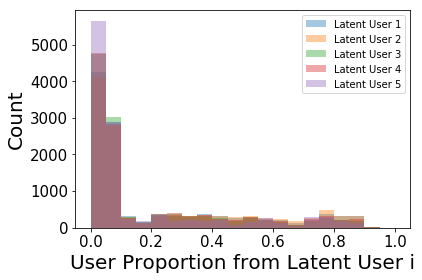

In [10]:
plt.figure()
for i in range(5):
    plt.hist(user_proportions_from_latent_users_bow[:, i], alpha=0.4, label="Latent User " + str(i+1),
            range=(0,1), bins=20)
plt.xlabel("User Proportion from Latent User i", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend()
plt.savefig('china_lu3.png')
plt.tick_params(labelsize=15)
plt.show()

# Inspect the first latent user

Note the following description from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

components_ : array, [n_components, n_features]
Variational parameters for topic word distribution. Since the complete conditional for topic word distribution is a Dirichlet, components_[i, j] can be viewed as pseudocount that represents the number of times word j was assigned to topic i. It can also be viewed as distribution over the words for each topic after normalization: model.components_ / model.components_.sum(axis=1)[:, np.newaxis].


(10379,)
Percentiles of feature pseudocounts for latent user 1:
[0.2        0.2        0.2        0.2        0.2        0.2
 0.2        0.2        0.2        0.2        0.2        0.2
 0.2        0.2        0.2        0.2        0.2        0.2000049
 0.20000508 0.20000537 0.20000586 0.20000613 0.20000623 0.20000637
 0.20000686 0.20000718 0.20000795 0.20000816 0.20000825 0.20000832
 0.20000842 0.20000866 0.20000907 0.20000957 0.20001025 0.2000113
 0.20001208 0.20001293 0.20001372 0.20001422 0.20001497 0.20001563
 0.20001574 0.2000158  0.20001584 0.20001588 0.20001592 0.20001597
 0.20001601 0.20001606 0.20001612 0.20001619 0.20001627 0.20001638
 0.20001653 0.20001665 0.20001678 0.20001698 0.20001735 0.20001775
 0.20001814 0.20001845 0.2000187  0.20001907 0.2000197  0.20002058
 0.20002134 0.20002208 0.20002296 0.20002404 0.20002509 0.20002649
 0.20002822 0.20003051 0.20003261 0.20003593 0.20004084 0.2000623
 0.20080982 0.20166101 0.20254965 0.20425363 0.20673042 0.21042111
 0.21666756 0.2

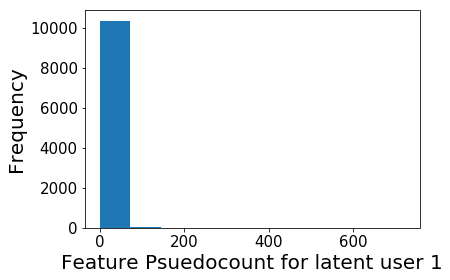

In [19]:
# lu1 is the vector of "pseudocounts": number of times a feature would be yes for latent user 1.

lu1 = latent_users[0, :]
print(lu1.shape)

print("Percentiles of feature pseudocounts for latent user 1:")
print(np.percentile(lu1, np.arange(0,100,1)))

plt.figure()
plt.hist(lu1)
plt.xlabel("Feature Psuedocount for latent user 1", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

# What is latent user 1 like?


In [20]:
lu1_indices = np.where(lu1 > np.percentile(lu1, 99))[0]
#lu1_indices = np.array(sorted(lu1_indices, key= lambda x: lu1[x], reverse=True))

# top_lu1_df = pd.DataFrame({'Feature': bow.columns.values[lu1_indices],
#                          'Latent User 1 Pseudocount': lu1[lu1_indices]})

top_lu1_df = pd.DataFrame({'Feature': train.columns.values[lu1_indices],
                         'Latent User 1 Pseudocount': lu1[lu1_indices]})

top_lu1_df.sort_values('Latent User 1 Pseudocount', inplace=True, ascending=False)

top_lu1_df.head(n=10)

(104,)


,Feature,Latent User 1 Pseudocount
94,Year_3.0,720.556025
24,Round_Angel,308.807332
96,Month_2.0,305.955376
95,Month_1.0,266.205841
22,Round_A,231.943954
93,Year_2.0,212.983860
14,Category_health,188.292691
97,Month_3.0,165.191779
92,Year_1.0,145.693569
31,Round_Seed,142.211165


So which users are very much like this latent user 1?

(9348,)
Percentiles of user proportions from latent user 1:
[0.02467379 0.02509828 0.02512279 0.02513873 0.02515341 0.02516415
 0.02517552 0.02518367 0.025191   0.02519836 0.02520503 0.02521081
 0.02521555 0.02522042 0.0252246  0.02522828 0.02523258 0.02523702
 0.02524126 0.02524652 0.02525109 0.0252551  0.02525846 0.02526216
 0.02526567 0.02526905 0.02527255 0.02527704 0.0252815  0.02528579
 0.02529037 0.0252957  0.02529967 0.02530344 0.02530773 0.02531125
 0.02531655 0.02532033 0.02532485 0.02533065 0.02533569 0.02533979
 0.02534433 0.02534865 0.02535276 0.02535763 0.02536171 0.02536692
 0.02537326 0.02537955 0.02538627 0.02539328 0.02539985 0.02540777
 0.02541559 0.02542268 0.02542831 0.02543626 0.02544431 0.02545304
 0.02546411 0.02547538 0.02548614 0.02549775 0.02551155 0.02552843
 0.02554665 0.02556502 0.02558692 0.02560923 0.02563832 0.02566797
 0.02570494 0.02575082 0.02580668 0.02587439 0.02595986 0.02639308
 0.18295092 0.2489212  0.30511316 0.35345917 0.3864326  0.41139478
 0

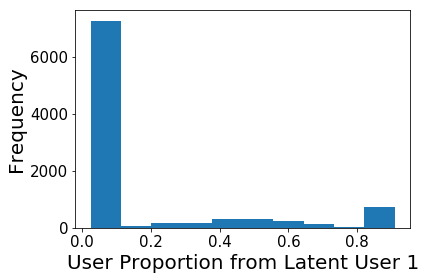

In [21]:
up1 = user_proportions_from_latent_users[:, 4]

print(up1.shape)


print("Percentiles of user proportions from latent user 1:")
print(np.percentile(up1, np.arange(0,100,1)))


plt.figure()
plt.hist(up1)
plt.xlabel("User Proportion from Latent User 1", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

what users are highest in component 1?

In [23]:
tmp_profile_df = train.copy()

tmp_profile_df.insert(0, "User Proportion from Latent User 1", up1)

tmp_profile_df.sort_values('User Proportion from Latent User 1', inplace=True, ascending=False)

tmp_profile_df.head()

,User Proportion from Latent User 1,AMOUNT,Category_AI,Category_adtech,Category_adtech/martech,Category_agtech,Category_analytics,Category_ar/vr,Category_cannabis,Category_clean tech,Category_cleantech,Category_cloud,Category_communications,Category_consumer goods,Category_consumer interet,Category_consumer internet,Category_consumer internt,Category_consumer products,Category_customer internet,Category_customer products,Category_cybersecurity,Category_deeptech,Category_dev,Category_drones,Category_education,Category_energy,Category_energytech,Category_enterpise,Category_enterprise,Category_enterprising,Category_entperprise,Category_ev,Category_femtech,Category_fintech,Category_food,Category_gaming,Category_gamng,Category_govtech,Category_greentech,Category_health,Category_hospitality,Category_industrial,Category_insurance,Category_iot,Category_legaltech,Category_lifestyle,Category_logistics,Category_marketing,Category_media,Category_mobile,...,First Investor_imec.xpand,First Investor_industr,First Investor_innogy,First Investor_innogy SE,First Investor_innogy Ventures/ Shell,First Investor_inovia,First Investor_inovia capital/ Chrysalis,First Investor_internal funding,First Investor_investiere.ch,First Investor_kakaopay corp/ DAYLI Financial Group,First Investor_layground Global,First Investor_leAD Sports/OurCrowd’s ADvantage Fund/ Accomplice,First Investor_lool ventures/ Next Gear,First Investor_ltimeter Capital,First Investor_lysian Park,First Investor_managed by Cedarpoint Investments,First Investor_nbr Tech Ventures,First Investor_next47/ BMW,First Investor_next47/ Microsoft,First Investor_parent company,First Investor_pi Ventures,First Investor_pi Ventures/,First Investor_responsAbility,First Investor_syndicate led by Ameritas Life Insurance,First Investor_the company's Board of Directors,First Investor_u,First Investor_undisclosed,First Investor_undisclosed angels,First Investor_undisclosed investors,First Investor_unknown investor/Venturra Capital,First Investor_venBIO,First Investor_venBio Partners,First Investor_venBio/ Novo,First Investor_Épimède/ InnovationQuarter,Year_0.0,Year_1.0,Year_2.0,Year_3.0,Month_1.0,Month_2.0,Month_3.0,Month_4.0,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Month_10.0,Month_11.0,Month_12.0
6583,0.909756,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3897,0.902429,0.285663,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3481,0.902117,0.285663,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3958,0.901504,0.214230,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3440,0.901420,0.214230,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Getting the Feature distributions for latent User 1.

Analogous to the word distributions for a topic.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html



(10379,)
Percentiles of the feature proportions for latent user 1:
[2.01850962e-05 2.01850962e-05 2.01850962e-05 2.01850962e-05
 2.01850962e-05 2.01850962e-05 2.01850962e-05 2.01850962e-05
 2.01850962e-05 2.01850962e-05 2.01850962e-05 2.01850962e-05
 2.01850962e-05 2.01850962e-05 2.01850962e-05 2.01850962e-05
 2.01850962e-05 2.01855906e-05 2.01856088e-05 2.01856381e-05
 2.01856876e-05 2.01857151e-05 2.01857254e-05 2.01857392e-05
 2.01857886e-05 2.01858206e-05 2.01858986e-05 2.01859198e-05
 2.01859285e-05 2.01859357e-05 2.01859463e-05 2.01859703e-05
 2.01860116e-05 2.01860625e-05 2.01861307e-05 2.01862363e-05
 2.01863154e-05 2.01864011e-05 2.01864812e-05 2.01865313e-05
 2.01866069e-05 2.01866737e-05 2.01866851e-05 2.01866908e-05
 2.01866949e-05 2.01866989e-05 2.01867029e-05 2.01867078e-05
 2.01867122e-05 2.01867171e-05 2.01867229e-05 2.01867298e-05
 2.01867382e-05 2.01867493e-05 2.01867646e-05 2.01867769e-05
 2.01867894e-05 2.01868095e-05 2.01868470e-05 2.01868877e-05
 2.01869268e-05 2.

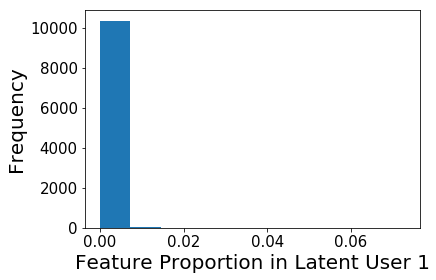

In [24]:
feature_distribution = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]


fd1 = feature_distribution[0, :]
print(fd1.shape)

print("Percentiles of the feature proportions for latent user 1:")
print(np.percentile(fd1, np.arange(0,100,1)))

plt.figure()
plt.hist(fd1)
plt.xlabel("Feature Proportion in Latent User 1", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

# Log-likelihood on our data
You'll want to get this on a test set as well if you run this. If the test set is much much worse something is wrong.


In [25]:
print("Log-likelihood:")
print(lda.score(train.values))

print("Average log-likelihood per data point:") # makes more sense to compare this given different data sets
print(lda.score(train.values)/train.shape[0])

Log-likelihood:
-402212.8082807516
Average log-likelihood per data point:
-43.026616204616126


In [26]:
print("Log-likelihood:")
print(lda.score(test.values))

print("Average log-likelihood per data point:") # makes more sense to compare this given different data sets
print(lda.score(test.values)/test.shape[0])

Log-likelihood:
-126937.50480348204
Average log-likelihood per data point:
-54.339685275463204


That's it for now.

Go have fun! And let us know how we can help!